Data loaded.


<ipython-input-9-3378221850>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace=True)


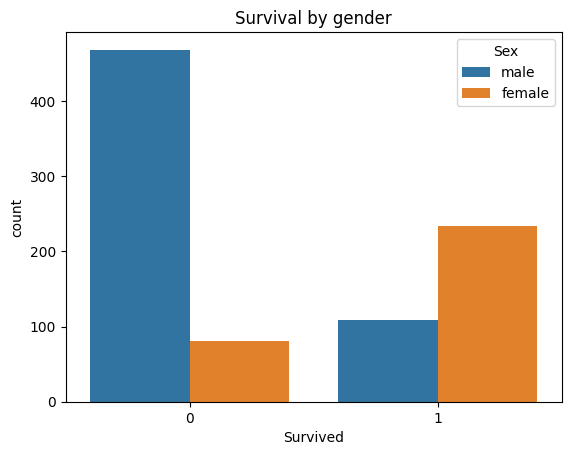

accuracy: 79.89%


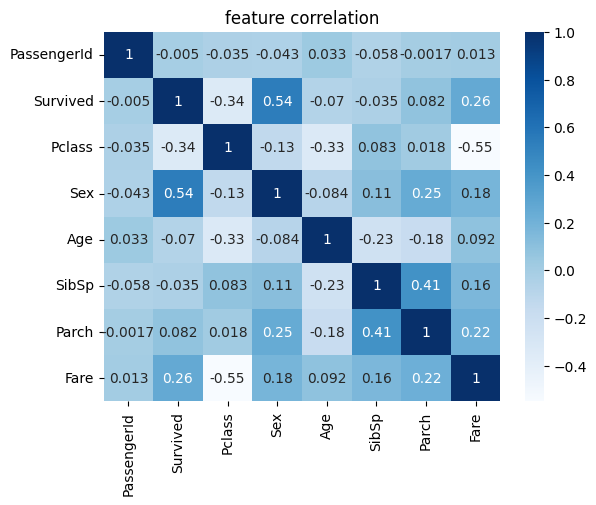

In [9]:
# goal of the task to predict if a person survived or not on the titanic based on the given data

#step 1 load the dataset
import pandas as pd
data=pd.read_csv("Titanic-Dataset.csv")
print("Data loaded.")

# step 2 : clean the data
data['Age'].fillna(data['Age'].mean(), inplace=True)
data.drop(columns=['Cabin','Name','Ticket','Embarked'], inplace=True) #droping unwanted data for this prediction.
data.dropna(inplace=True)
# step 3 survival
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Survived', hue='Sex', data=data)
plt.title('Survival by gender')
plt.show()
 #step 4 prepare the data for training

data['Sex']=data['Sex'].map({'male':0,'female':1})
X= data[['Pclass','Sex','Age','Fare']]
y=data['Survived']

#step 5 split the data into training and testing

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#step 6 train the model using logistic regression model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

#step 7 testing the model
y_pred=model.predict(X_test)

#step 8 accuracy score
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
print("accuracy: {:.2f}%".format(acc*100))


#step 9 creating heatmap to show how each col is related to others

sns.heatmap(data.corr(),annot=True,cmap='Blues')
plt.title("feature correlation")
plt.show()

